# Escola de Dados - Python para inovação cívica
## Módulo 1: Noções básicas de estatística descritiva e pré-processamento

- [Aula 8](#Aula-8:-Introdução-a-estatística)
- [Aula 9](#Aula-9:-Medidas-de-tendência-central-e-dispersão)
- [Aula 10](#Aula-10:-Outliers-e-valores-faltantes)
- [Aula 12](#Aula-12:-Operações-básicas-com-python)
- [Aula 13](#Aula-13:-Métodos-`filter`-e-`sort_values`)
- [Aula 14](#Aula-14:-Operações-com-dados-e-método-`apply`)
- [Aula 15](#Aula-15:-Operações-com-dados-e-método-`groupby`)


### Aula 8: Introdução a estatística

Os dados que usaremos nesse notebook pode ser encontrado em: [TSE. Candidaturas em 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1).

Trabalharemos com os dados referentes as candidaturas nos estados de Pernambuco e Rio Grande do Norte.


In [1]:
import pandas as pd

In [2]:
dados_pe_rn = ['C:/Users/daniu/Documents/GitHub/python-inovacao-civica/semana_2/base_dados/consulta_cand_2020_PE.csv', 'C:/Users/daniu/Documents/GitHub/python-inovacao-civica/semana_2/base_dados/consulta_cand_2020_RN.csv']

In [3]:
lista_df = []

for dados_estado in dados_pe_rn:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1')
    lista_df.append(df_estado)

In [4]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

É possível criar um dataframe apenas com os dados de candidaturas para as Câmeras de Vereados dos estados.

In [5]:
df_vereadores = df_completo[df_completo['CD_CARGO'] == 13].copy()

In [6]:
df_vereadores.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

O método `pd.describe` traz um quadro com algumas medidas da estatística descritiva, como as medidas de tendência central, medidas de dispersão e quartis, excluindo os valores NaN (not a number).

In [7]:
df_vereadores.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,SG_UE,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA
count,29269.0,29269.0,29269.0,29269.0,29269.000000,29269.0,2.926900e+04,29269.000000,2.926900e+04,29269.000000,...,29269.000000,29269.000000,29269.000000,29269.000000,2.926900e+04,29269.000000,29269.0,2.926900e+04,29269.000000,29269.000000
mean,2020.0,2.0,1.0,426.0,22341.673990,13.0,1.797434e+11,32889.886569,2.922523e+10,11.559978,...,5.627387,2.658000,2.204243,532.344802,8.044686e+04,4.202569,-1.0,6.002235e+18,2.063275,2.054665
std,0.0,0.0,0.0,0.0,3562.350455,0.0,1.404864e+10,21536.107047,3.108040e+10,1.940800,...,1.701545,2.056771,1.007947,321.971818,1.798536e+05,1.316052,0.0,1.400676e+15,1.379490,1.379635
min,2020.0,2.0,1.0,426.0,16004.000000,13.0,1.700006e+11,10000.000000,1.321943e+07,3.000000,...,1.000000,1.000000,1.000000,101.000000,1.230775e+04,-1.000000,-1.0,6.000126e+18,-1.000000,-1.000000
25%,2020.0,2.0,1.0,426.0,18031.000000,13.0,1.700009e+11,15123.000000,4.714564e+09,12.000000,...,4.000000,1.000000,1.000000,257.000000,1.230775e+04,4.000000,-1.0,6.001217e+18,2.000000,2.000000
50%,2020.0,2.0,1.0,426.0,23833.000000,13.0,1.700011e+11,23600.000000,1.015996e+10,12.000000,...,6.000000,3.000000,3.000000,532.000000,2.461775e+04,5.000000,-1.0,6.001913e+18,2.000000,2.000000
75%,2020.0,2.0,1.0,426.0,25135.000000,13.0,2.000008e+11,45333.000000,5.514077e+10,12.000000,...,6.000000,3.000000,3.000000,931.000000,5.226632e+04,5.000000,-1.0,6.002876e+18,2.000000,2.000000
max,2020.0,2.0,1.0,426.0,30031.000000,13.0,2.000014e+11,90999.000000,9.997776e+10,12.000000,...,8.000000,9.000000,6.000000,999.000000,1.011150e+06,5.000000,-1.0,6.011688e+18,17.000000,20.000000


Para gerar relatórios interativos em HTML a partir de um dataframe do pandas usaremos a biblioteca Pandas Profiling, com ele para cada coluna será apresentado estatístico correspondente ao tipo de dado.

In [8]:
import numpy as np


In [9]:
#profile = ProfileReport(df_vereadores, title="Introdução - Pandas Profiling Report")

In [10]:
#profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_pe_rn.html")

## Em PE e RN, houveram quantas candidaturas para a prefeitura?

In [11]:
df_completo.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,N,-1,6004724720206170105,2,DEFERIDO,2,DEFERIDO,SIM
1,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6000665220206170064,2,DEFERIDO,2,DEFERIDO,SIM
2,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,SUPLENTE,N,S,-1,6001433520206170008,2,DEFERIDO,2,DEFERIDO,SIM
3,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,ELEITO POR QP,N,S,-1,6001353020206170082,2,DEFERIDO,2,DEFERIDO,SIM
4,05/08/2021,12:18:13,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,#NULO#,N,S,-1,6002360820206170037,-1,#NULO#,-1,#NULO#,NÃO


In [12]:
df_completo['DS_CARGO'].value_counts().sum()

31656

### Aula 9: medidas de tendência central e dispersão

As medidas de tendência central servem para determinar o valor central de uma distribuição. Vamos explorar mais um pouco nosso dataframe e descobrir qual a moda (valor que mais se repete) da colina 'SG_PARTIDO'

In [13]:
df_vereadores['SG_PARTIDO'].mode()

0    PSB
dtype: object

A média aritmética da coluna 'NR_IDADE_DATA_POSSE' é:

In [14]:
df_vereadores['NR_IDADE_DATA_POSSE'].mean()

44.09252109740681

Continuando a explorar a idade das pessoas candidatas na data da posse, queremos saber qual é o valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores (mediana).


In [15]:
df_vereadores['NR_IDADE_DATA_POSSE'].median()

44.0

Qual a variância do dado 'NR_IDADE_DATA_POSSE'?

In [16]:
df_vereadores['NR_IDADE_DATA_POSSE'].var()

128.33037627675878

Qual o desvio padrão do dado 'NR_IDADE_DATA_POSSE'?

In [17]:
df_vereadores['NR_IDADE_DATA_POSSE'].std()

11.32829979638422

## Qual a média, moda e mediana do 'VR_DESPESA_MAX_CAMPANHA'?

In [18]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mode()

0    12307.75
dtype: float64

In [19]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mean()

80446.86453790795

In [20]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].median()

24617.75

In [21]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].var()

32347323975.501507

In [22]:
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].std()

179853.61818851883

### Aula 10: Outliers e valores faltantes


De acordo com o dicionário de dados do conjunto de dados do TSE, os valores faltantes estão preenchidos com #NULO#, no entanto o Pandas não reconhece essa palavra como um missing. Faremos a substituição da string "#NULO#" pelo valor `None` nas colunas com valores categóricos.

In [23]:
colunas_categoricas = ['NM_TIPO_ELEICAO', 'DS_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'NM_UE', 'DS_CARGO', 
                       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_EMAIL', 
                       'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'SG_PARTIDO', 
                       'NM_PARTIDO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'DS_NACIONALIDADE', 
                       'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO', 
                       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 
                       'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_PLEITO', 
                       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'
                      ]


In [24]:
df_vereadores[colunas_categoricas] = df_vereadores.loc[:, colunas_categoricas].replace({'#NULO#': None})

In [25]:
df_vereadores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29269 entries, 0 to 31654
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     29269 non-null  object 
 1   HH_GERACAO                     29269 non-null  object 
 2   ANO_ELEICAO                    29269 non-null  int64  
 3   CD_TIPO_ELEICAO                29269 non-null  int64  
 4   NM_TIPO_ELEICAO                29269 non-null  object 
 5   NR_TURNO                       29269 non-null  int64  
 6   CD_ELEICAO                     29269 non-null  int64  
 7   DS_ELEICAO                     29269 non-null  object 
 8   DT_ELEICAO                     29269 non-null  object 
 9   TP_ABRANGENCIA                 29269 non-null  object 
 10  SG_UF                          29269 non-null  object 
 11  SG_UE                          29269 non-null  int64  
 12  NM_UE                          29269 non-null 

Geraremos um novo relatório usando o Pandas Profiling para visualizar as mudanças.

In [71]:
profile = ProfileReport(df_vereadores, title="Limpeza dos dados - Pandas Profiling Report")
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_pe_rn_limpo.html")

Summarize dataset:   0%|          | 0/77 [00:00<?, ?it/s]

/home/cecivieira/Projetos/python-inovacao-civica/.venv/lib/python3.8/site-packages/missingno/missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
/home/cecivieira/Projetos/python-inovacao-civica/.venv/lib/python3.8/site-packages/pandas_profiling/model/summary.py:194: UserWarning: There was an attempt to generate the bar missing values diagrams, but this failed.
    To hide this warning, disable the calculation
    (using `df.profile_report(missing_diagrams={"bar": False}`)
    If this is problematic for your use case, please report this as an issue:
    https://github.com/pandas-profiling/pandas-profiling/issues
    (include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (64).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Aula 12: Operações básicas com dados

Costumamos construir um subdataframe apenas com as colunas que usaremos na nossa análise. Existem várias formas de filtrar as linhas e colunas. Vamos aprender como fazer isso separadamente: 

Filtrar as 26 colunas pertinentes para nosso estudo.

In [26]:
df_vereadores_pe_rn_reduzido = df_vereadores[
    ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']
].copy()

In [27]:
df_vereadores_pe_rn_reduzido.shape

(29269, 26)

Agora selecionaremos apenas as pessoas que tem sua candidaturas "apto", "deferido" e "deferido com recurso".

In [28]:
df_vereadores_pe_rn_reduzido_aptas = df_vereadores_pe_rn_reduzido[
    df_vereadores_pe_rn_reduzido['CD_SITUACAO_CANDIDATURA'] == 12
]

In [29]:
df_vereadores_pe_rn_reduzido_aptas_deferidas = df_vereadores_pe_rn_reduzido_aptas[
    (df_vereadores_pe_rn_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores_pe_rn_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
]

In [30]:
df_vereadores_pe_rn_reduzido_aptas_deferidas.shape

(27793, 26)

Agora, aprenderemos a filtrar usando a função `pd.loc`:

In [31]:
colunas_desejadas = ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']

In [32]:
filtro_linhas = (df_vereadores['CD_SITUACAO_CANDIDATURA'] == 12) & (
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
)

In [33]:
df_vereadores_pe_rn_reduzido_aptas_deferidas_2 = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [34]:
df_vereadores_pe_rn_reduzido_aptas_deferidas_2.shape

(27793, 26)

In [35]:
df_vereadores_pe_rn = df_vereadores_pe_rn_reduzido_aptas_deferidas_2.copy()

In [36]:
df_vereadores_pe_rn.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,CD_COR_RACA,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND
0,2020,MUNICIPAL,PE,23817,CARUARU,13,VEREADOR,17008,MARIA DE LOURDES ALVES DE SOUZA,DONA LOURDES DA BONANÇA,...,3,PARDA,149376.80,5,SUPLENTE,N,12,APTO,2,DEFERIDO
1,2020,MUNICIPAL,PE,23094,ÁGUAS BELAS,13,VEREADOR,15515,JOSÉ MAREVALDO BARROS DE OLIVEIRA,MAREVALDO DA RUA 15,...,3,PARDA,48405.01,5,SUPLENTE,N,12,APTO,2,DEFERIDO
2,2020,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,25033,JOSÉ AGNIS PERKLES RÊGO,JOSÉ AGNIS,...,1,BRANCA,1011149.65,5,SUPLENTE,N,12,APTO,2,DEFERIDO
3,2020,MUNICIPAL,PE,24970,OURICURI,13,VEREADOR,45777,DELVANI SILVA SOBRAL,DELVANIA SOBRAL,...,3,PARDA,26120.37,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO
7,2020,MUNICIPAL,PE,23108,SANTA CRUZ,13,VEREADOR,70444,ANTONIO JOANDSON DE ALENCAR AMORIM,PEPI,...,3,PARDA,18991.16,5,SUPLENTE,N,12,APTO,2,DEFERIDO


## Sua vez, crie um dataframe com apenas os nomes e partidos das pessoas candidatas que se autodeclararam como 'PARDA', 'PRETA' e 'INDÍGENA'

In [38]:
filtro_linhas = (df_vereadores['DS_COR_RACA'] == 'PARDA') | (df_vereadores['DS_COR_RACA'] == 'PRETA') | (df_vereadores['DS_COR_RACA'] == 'INDIGENA')


In [39]:
df_vereadores_ppi = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [40]:
df_vereadores_ppi.shape

(18200, 26)

In [41]:
df_vereadores_ppi.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,CD_COR_RACA,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND
0,2020,MUNICIPAL,PE,23817,CARUARU,13,VEREADOR,17008,MARIA DE LOURDES ALVES DE SOUZA,DONA LOURDES DA BONANÇA,...,3,PARDA,149376.80,5,SUPLENTE,N,12,APTO,2,DEFERIDO
1,2020,MUNICIPAL,PE,23094,ÁGUAS BELAS,13,VEREADOR,15515,JOSÉ MAREVALDO BARROS DE OLIVEIRA,MAREVALDO DA RUA 15,...,3,PARDA,48405.01,5,SUPLENTE,N,12,APTO,2,DEFERIDO
3,2020,MUNICIPAL,PE,24970,OURICURI,13,VEREADOR,45777,DELVANI SILVA SOBRAL,DELVANIA SOBRAL,...,3,PARDA,26120.37,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO
4,2020,MUNICIPAL,PE,24996,PALMARES,13,VEREADOR,90090,MARILENE SHEILLA DE OLIVEIRA,SHEILLA DO MEIO AMBIENTE,...,3,PARDA,26666.50,-1,None,N,3,INAPTO,6,RENÚNCIA
6,2020,MUNICIPAL,PE,25119,PAUDALHO,13,VEREADOR,40123,LEANDRO TEIXEIRA DOS SANTOS,DOUTOR LEANDRO TEIXEIRA,...,2,PRETA,17845.22,-1,None,N,3,INAPTO,6,RENÚNCIA


### Aula 13: Métodos `filter` e `sort_values`

Vamos filtrar todas as colunas que possuam as letras "DIDATO" no seu título:

In [42]:
df_vereadores_pe_rn_nomes = df_vereadores_pe_rn.filter(like='DIDATO', axis=1)
df_vereadores_pe_rn_nomes.head()

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
0,17008,MARIA DE LOURDES ALVES DE SOUZA,DONA LOURDES DA BONANÇA,None
1,15515,JOSÉ MAREVALDO BARROS DE OLIVEIRA,MAREVALDO DA RUA 15,None
2,25033,JOSÉ AGNIS PERKLES RÊGO,JOSÉ AGNIS,None
3,45777,DELVANI SILVA SOBRAL,DELVANIA SOBRAL,None
7,70444,ANTONIO JOANDSON DE ALENCAR AMORIM,PEPI,None


Para ordenar as linhas a partir das colunas 'NM_SOCIAL_CANDIDATO' e 'NM_CANDIDATO, usamos o método df.sort_values:

In [43]:
df_vereadores_pe_rn_nomes.sort_values(by=['NM_SOCIAL_CANDIDATO', 'NM_CANDIDATO'], 
                                      ascending=True, 
                                      na_position='last', 
                                      ignore_index=False
)

,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO
19514,40400,ADRIANO PEREIRA DINIZ,ADRIANO DINIZ,ADRIANO DINIZ
295,12111,ADRYELLY FERRAZ,ADRIELLY FERRAZ,ADRYELLY FERRAZ
13931,65333,BRUNA RAFAELA NASCIMENTO,BRUNA,BRUNA RAFAELA NASCIMENTO
22476,13777,DANIELLE MEDEIROS DE ARAUJO,DANIELLE RONDINELE,DANIELLE MEDEIROS DE ARAUJO
30609,40111,DÁVILA SALUSTIANO DA CRUZ,DÁVILA MEDEIROS,DAVILA MEDEIROS SALUSTIANO DA CRUZ
...,...,...,...,...
18198,45555,ÍTALO HENRIQUE GOMES DE MEDEIROS,ÍTALO HENRIQUE,None
9139,65666,ÍTALO HENRIQUE KOKAY,DR ÍTALO KOKAY,None
30316,13333,ÍTALO MATHEUS ARAÚJO DE MENEZES,ÍTALO,None
26745,40111,ÍTALO VICTOR DE SOUZA DANTAS,ITINHO,None


## Selecione apenas as colunas cujo o título possua "DS" e organize em ordem descrescente. Qual o gênero das candidaturas das 3 primeiras linhas?

In [44]:
df_vereadores_pe_rn_DS = df_vereadores_pe_rn.filter(like='DS', axis=1)
df_vereadores_pe_rn_DS.head()

,DS_CARGO,DS_GENERO,DS_COR_RACA,DS_SIT_TOT_TURNO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND
0,VEREADOR,FEMININO,PARDA,SUPLENTE,APTO,DEFERIDO
1,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO
2,VEREADOR,MASCULINO,BRANCA,SUPLENTE,APTO,DEFERIDO
3,VEREADOR,FEMININO,PARDA,ELEITO POR QP,APTO,DEFERIDO
7,VEREADOR,MASCULINO,PARDA,SUPLENTE,APTO,DEFERIDO


### Aula 14: Operações com dados e método `apply`

Podemos criar uma nova coluna a partir de operações sobre outras colunas. No exemplo abaixo vamos descobrir o gasto médio diário declarado por cada candidatura.

In [45]:
total_dias_campanha = 45
df_vereadores_pe_rn['GASTO_DIARIO'] = df_vereadores_pe_rn['VR_DESPESA_MAX_CAMPANHA'] / total_dias_campanha

In [46]:
df_vereadores_pe_rn.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,GASTO_DIARIO
0,2020,MUNICIPAL,PE,23817,CARUARU,13,VEREADOR,17008,MARIA DE LOURDES ALVES DE SOUZA,DONA LOURDES DA BONANÇA,...,PARDA,149376.80,5,SUPLENTE,N,12,APTO,2,DEFERIDO,3319.484444
1,2020,MUNICIPAL,PE,23094,ÁGUAS BELAS,13,VEREADOR,15515,JOSÉ MAREVALDO BARROS DE OLIVEIRA,MAREVALDO DA RUA 15,...,PARDA,48405.01,5,SUPLENTE,N,12,APTO,2,DEFERIDO,1075.666889
2,2020,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,25033,JOSÉ AGNIS PERKLES RÊGO,JOSÉ AGNIS,...,BRANCA,1011149.65,5,SUPLENTE,N,12,APTO,2,DEFERIDO,22469.992222
3,2020,MUNICIPAL,PE,24970,OURICURI,13,VEREADOR,45777,DELVANI SILVA SOBRAL,DELVANIA SOBRAL,...,PARDA,26120.37,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO,580.452667
7,2020,MUNICIPAL,PE,23108,SANTA CRUZ,13,VEREADOR,70444,ANTONIO JOANDSON DE ALENCAR AMORIM,PEPI,...,PARDA,18991.16,5,SUPLENTE,N,12,APTO,2,DEFERIDO,422.025778


Explorando mais um pouco esses dados, trabalharemos apenas com os dados das candidaturas de Pernambuco e classificaremos os gastos médios diários de acordo com os conceitos de quartil e valores discrepantes que vimos nos vídeos sobre estatística:

In [47]:
df_vereadores_pe = df_vereadores_pe_rn[df_vereadores_pe_rn['SG_UF'] == 'PE'].copy()

In [48]:
primeiro_quartil = df_vereadores_pe['GASTO_DIARIO'].quantile(0.25)
terceiro_quartil = df_vereadores_pe['GASTO_DIARIO'].quantile(0.75)

In [49]:
intervalo_interquartil = terceiro_quartil - primeiro_quartil

In [50]:
limite_inferior = primeiro_quartil - (intervalo_interquartil * 1.5)
limite_superior = terceiro_quartil + (intervalo_interquartil * 1.5)

In [51]:
def classificacao_gasto(row):
    if row < limite_inferior:
        return 'muito abaixo da média'
    elif row >= limite_inferior and row < primeiro_quartil:
        return 'abaixo da média'
    elif row >= primeiro_quartil and row <= terceiro_quartil:
        return 'na média'
    elif row > terceiro_quartil and row <= limite_superior:
        return 'acima da média'
    else:
        return 'muito acima da média'

In [52]:
df_vereadores_pe['CLASSIFICACAO_GASTO_DIARIO'] = df_vereadores_pe['GASTO_DIARIO'].apply(classificacao_gasto)

In [53]:
df_vereadores_pe.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,GASTO_DIARIO,CLASSIFICACAO_GASTO_DIARIO
0,2020,MUNICIPAL,PE,23817,CARUARU,13,VEREADOR,17008,MARIA DE LOURDES ALVES DE SOUZA,DONA LOURDES DA BONANÇA,...,149376.80,5,SUPLENTE,N,12,APTO,2,DEFERIDO,3319.484444,muito acima da média
1,2020,MUNICIPAL,PE,23094,ÁGUAS BELAS,13,VEREADOR,15515,JOSÉ MAREVALDO BARROS DE OLIVEIRA,MAREVALDO DA RUA 15,...,48405.01,5,SUPLENTE,N,12,APTO,2,DEFERIDO,1075.666889,na média
2,2020,MUNICIPAL,PE,25313,RECIFE,13,VEREADOR,25033,JOSÉ AGNIS PERKLES RÊGO,JOSÉ AGNIS,...,1011149.65,5,SUPLENTE,N,12,APTO,2,DEFERIDO,22469.992222,muito acima da média
3,2020,MUNICIPAL,PE,24970,OURICURI,13,VEREADOR,45777,DELVANI SILVA SOBRAL,DELVANIA SOBRAL,...,26120.37,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO,580.452667,na média
7,2020,MUNICIPAL,PE,23108,SANTA CRUZ,13,VEREADOR,70444,ANTONIO JOANDSON DE ALENCAR AMORIM,PEPI,...,18991.16,5,SUPLENTE,N,12,APTO,2,DEFERIDO,422.025778,na média


Para facilitar a visualização faremos um gráfico de barras usando a biblioteca matplotlib:

In [54]:
from matplotlib import pyplot as plt

In [55]:
# guarda na variável "classificacao" uma lista com os rótulos usados para classificar os gastos
classificacao = df_vereadores_pe['CLASSIFICACAO_GASTO_DIARIO'].unique().tolist()

In [56]:
#guarda na variável "total_por_classificacao" uma lista a quantidade de ocorrência de cada rótulo
total_por_classificacao = df_vereadores_pe['CLASSIFICACAO_GASTO_DIARIO'].value_counts().to_list()

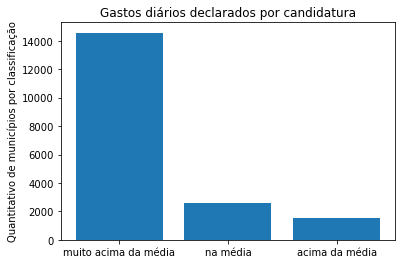

In [57]:
plt.bar(classificacao, total_por_classificacao)
plt.title('Gastos diários declarados por candidatura')
plt.ylabel('Quantitativo de municípios por classificação')

plt.show()

### Aula 15: Operações com dados e método `groupby`

Usando o método groupby podemos agrupar dados segundo informações de uma coluna e fazer operações com o agrupamento.

As perguntas que queremos responder são: quantas mulheres são candidatas? Qual a distribuição de pessoas por grupo racial? Quantidade de mulheres por grupo racial? E qual partido tem mais mulheres em cada grupo racial?


In [58]:
colunas_desejadas = ['SG_PARTIDO', 'DS_GENERO', 'DS_COR_RACA']
filtro = df_vereadores_pe_rn['SG_UF'] == 'PE'

In [59]:
df_vereadores_pe_sexo_raca = df_vereadores_pe_rn.loc[filtro, colunas_desejadas]

In [60]:
df_vereadores_pe_sexo_raca.head()

,SG_PARTIDO,DS_GENERO,DS_COR_RACA
0,PSL,FEMININO,PARDA
1,MDB,MASCULINO,PARDA
2,DEM,MASCULINO,BRANCA
3,PSDB,FEMININO,PARDA
7,AVANTE,MASCULINO,PARDA


Agrupando por gênero, quantas candidaturas temos em cada um?

In [61]:
df_vereadores_pe_sexo_raca.groupby(['DS_GENERO']).count()

,SG_PARTIDO,DS_COR_RACA
DS_GENERO,,
FEMININO,6226,6226
MASCULINO,12523,12523


E por raça?

In [62]:
df_vereadores_pe_sexo_raca.groupby(['DS_COR_RACA']).count()

,SG_PARTIDO,DS_GENERO
DS_COR_RACA,,
AMARELA,53,53
BRANCA,6486,6486
INDÍGENA,116,116
PARDA,9955,9955
PRETA,2030,2030
SEM INFORMAÇÃO,109,109


Da candidaturas do gênero feminino, quantas temos em cada grupo racial?

In [63]:
df_vereadores_pe_sexo_raca[df_vereadores_pe_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).count()

SG_PARTIDO
DS_GENERO DS_COR_RACA               
FEMININO  AMARELA                 21
          BRANCA                2354
          INDÍGENA                35
          PARDA                 3148
          PRETA                  628
          SEM INFORMAÇÃO          40

Entre as candidaturas do gênero feminino, quais os partidos com maior número de representação em cada grupo racial?

In [64]:
df_vereadores_pe_sexo_raca[df_vereadores_pe_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).max()

SG_PARTIDO
DS_GENERO DS_COR_RACA                  
FEMININO  AMARELA          REPUBLICANOS
          BRANCA          SOLIDARIEDADE
          INDÍGENA                   UP
          PARDA                      UP
          PRETA                      UP
          SEM INFORMAÇÃO             PT

## Agora é a sua vez, entre as candidaturas do sexo masculino, quais os partidos com o menor número de representantes em cada grupo racial?

In [65]:
df_vereadores_pe_sexo_raca[df_vereadores_pe_sexo_raca['DS_GENERO'] == 'MASCULINO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).min()

SG_PARTIDO
DS_GENERO DS_COR_RACA              
MASCULINO AMARELA               DEM
          BRANCA             AVANTE
          INDÍGENA           AVANTE
          PARDA              AVANTE
          PRETA              AVANTE
          SEM INFORMAÇÃO     AVANTE